# How to set the settings

A lot of features in efel can have their behaviour changed with settings, in order to be more customisable, depending on the traces and the need of the user. Here, we are going to see how to change the settings with an exmaple, and where to find the list of all the settings in efel with their default values.

For this example, we are going to use a trace of a cell model with a bAP (backpropagating action potential) stimulus, recorded in the dendrite.

In [3]:
import efel

import numpy
import json

%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

test_url = '../../tests/testdata/allfeatures/testbap2data.txt'
test_data = numpy.loadtxt(test_url)
time = test_data[:,0]
voltage = test_data[:, 1]

We can now plot this data

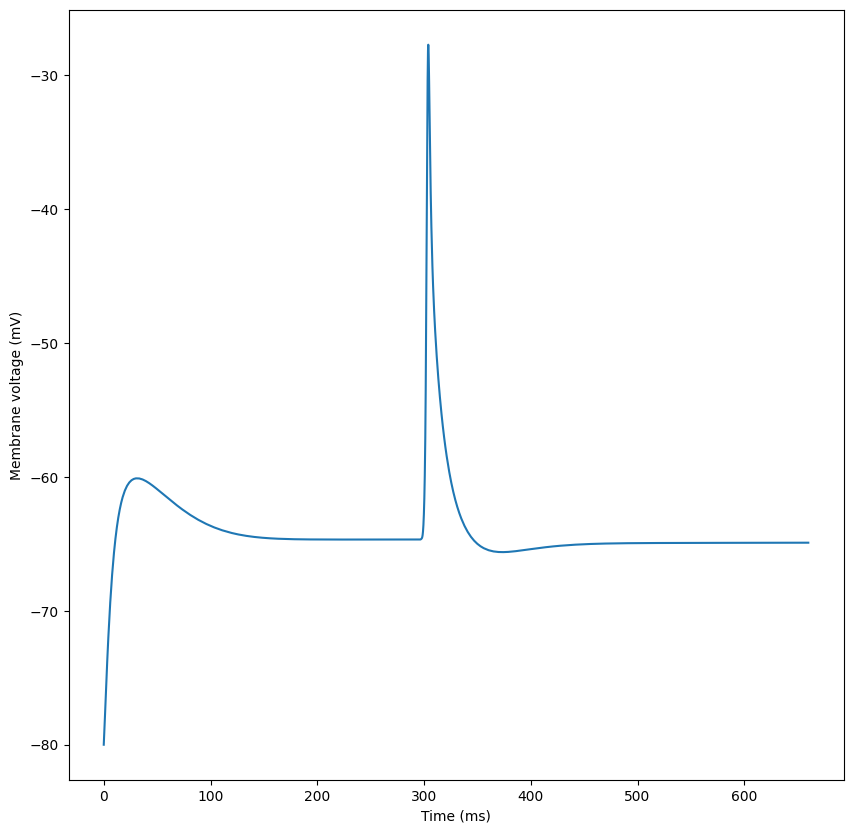

In [4]:
plt.rcParams['figure.figsize'] = 10, 10

fig1, ax1 = plt.subplots(1)
ax1.plot(time, voltage)
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane voltage (mV)');

Now, let us extract the peak time. We expect one value shortly after 300 ms.

In [5]:
stim_start = 295
stim_end = 500
trace = {'T': time, 'V': voltage, 'stim_start': [stim_start], 'stim_end': [stim_end]}

feature_values = efel.get_feature_values([trace], ['peak_time'])[0]
print(feature_values)

{'peak_time': None}


.../efel/pyfeatures/cppfeature_access.py:14: RuntimeWarning: Error while calculating peak_time, An error occurred while computing the feature, feature is not found. Voltage never goes below or above threshold in spike detection.
  warnings.warn(


We can see that we don't have any value returned. The reason is that, by default, eFEL looks for spikes that go above -20 mV. This is fine for most cells when recorded in the soma, but here, we are recording a spike in the dendrite after a soma stimulus. This spike has a smaller amplitude than the one in the soma, and is thus below the spike-detecting threshold.

This can be solved by modifying the settings, using the easy to use set_setting function! By simply modfying the default threshold value of -20 to a lower value, e.g. -30, the spike gets detected!

In [6]:
efel.api.set_setting('Threshold', -30.)

feature_values = efel.get_feature_values([trace], ['peak_time'])[0]
print(feature_values)

{'peak_time': array([304.])}


You can reset the settings to their default value at any time using the reset() function. It is good practice to use it whenever you want to change the settings, in order to be sure that previously set settings are not interfering with your new settings.

In [3]:
efel.reset()

The settings can also be passed down to efel by passing them through the trace dictionary, inside a list:

In [8]:
trace['Threshold'] = [-30.]
feature_values = efel.get_feature_values([trace], ['peak_time'])[0]
print(feature_values)

{'peak_time': array([304.])}


The complete list of settings and their default value can be found in the documentation of [the Settings class here](https://efel.readthedocs.io/en/latest/_autosummary/efel.settings.html#efel.settings.Settings)